In [ ]:
# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load dataset
df = pd.read_csv('/content/dataset.csv')# print all column
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


EDA


In [ ]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [ ]:
# drop missing values
df.dropna(inplace=True)

# drop customerID
df.drop('Customer_ID', axis=1, inplace=True)

Summary Of Numerical Columns

In [ ]:
# summary dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,43.26700,15.242311,18.00,30.0000,43.000,56.0000,69.00
Annual_Income,1000.0,111.96296,52.844111,20.01,67.8000,114.140,158.4525,199.73
Total_Spend,1000.0,5080.79265,2862.123350,108.94,2678.6750,4986.195,7606.4700,9999.64
Years_as_Customer,1000.0,9.72700,5.536346,1.00,5.0000,9.000,14.0000,19.00
Num_of_Purchases,1000.0,49.45600,28.543595,1.00,25.0000,49.000,74.0000,99.00
Average_Transaction_Amount,1000.0,266.87653,145.873445,10.46,139.6825,270.100,401.6025,499.57
Num_of_Returns,1000.0,4.61200,2.896869,0.00,2.0000,5.000,7.0000,9.00
Num_of_Support_Contacts,1000.0,1.93400,1.402716,0.00,1.0000,2.000,3.0000,4.00
Satisfaction_Score,1000.0,2.97400,1.391855,1.00,2.0000,3.000,4.0000,5.00
Last_Purchase_Days_Ago,1000.0,182.89000,104.391319,1.00,93.0000,180.500,274.0000,364.00


Check Unique Values

In [ ]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

Gender : ['Other' 'Male' 'Female']
Email_Opt_In : [ True False]
Promotion_Response : ['Responded' 'Ignored' 'Unsubscribed']
Target_Churn : [ True False]


Check Missing Values

In [ ]:
# check missing value
print(df.isnull().sum())

Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64


<Axes: >

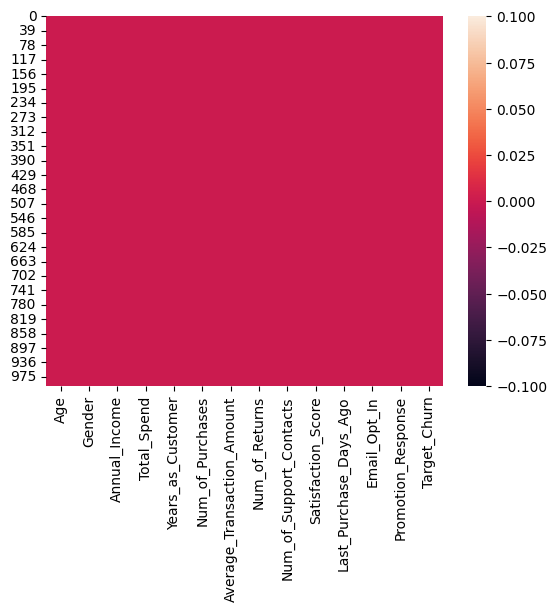

In [ ]:
# heatmap for missing value
sns.heatmap(df.isnull())

Visualization

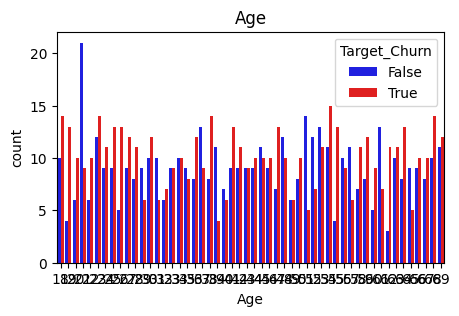

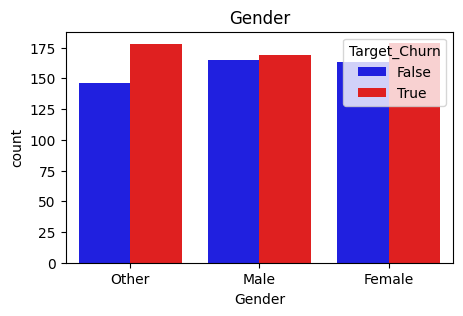

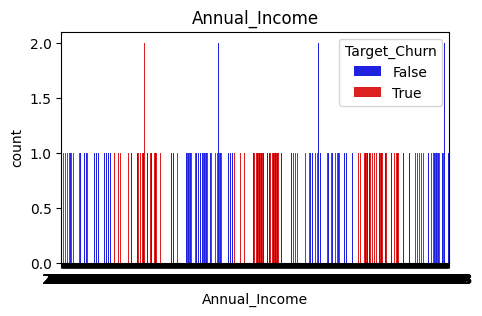

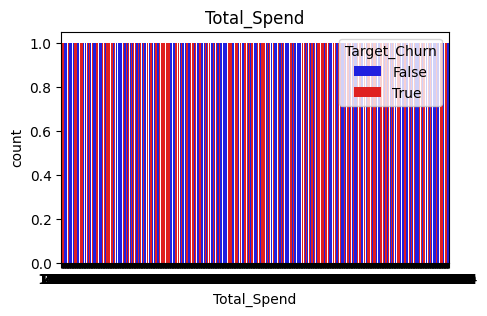

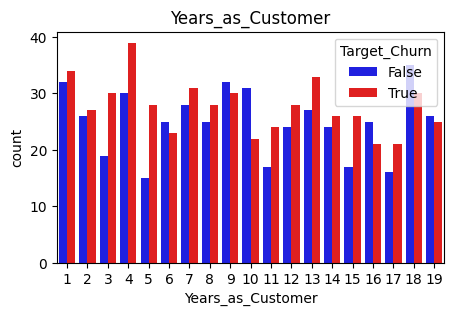

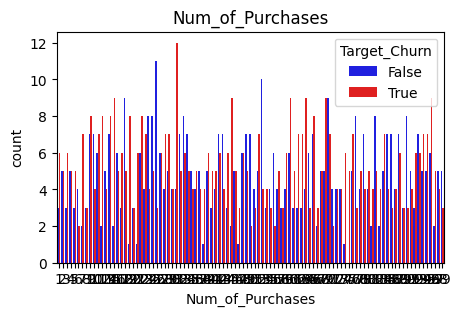

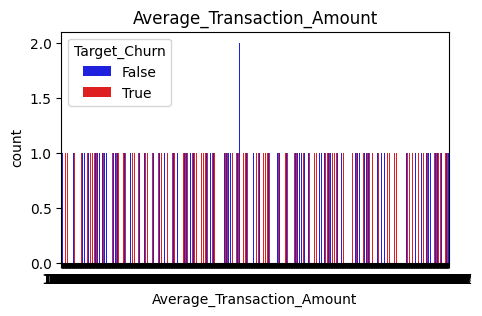

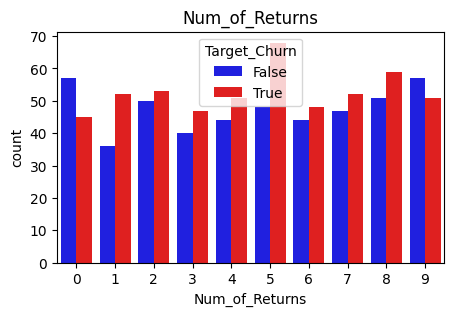

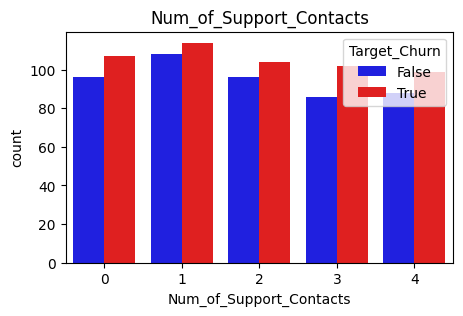

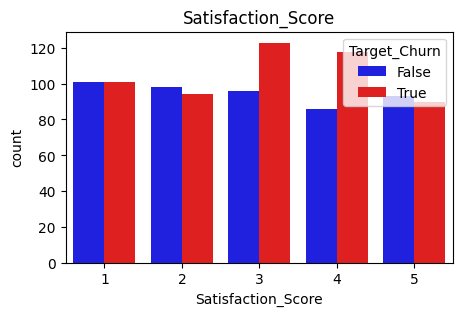

In [ ]:
# Define colors for True and False
colors = {True: 'red', False: 'blue'}

# Update the palette to use boolean keys True and False
palette = {True: 'red', False: 'blue'}

for i, predictor in enumerate(df.drop(columns=['Target_Churn', 'Promotion_Response', 'Email_Opt_In', 'Last_Purchase_Days_Ago'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Target_Churn', palette=palette)
    plt.title(predictor)
    plt.show()

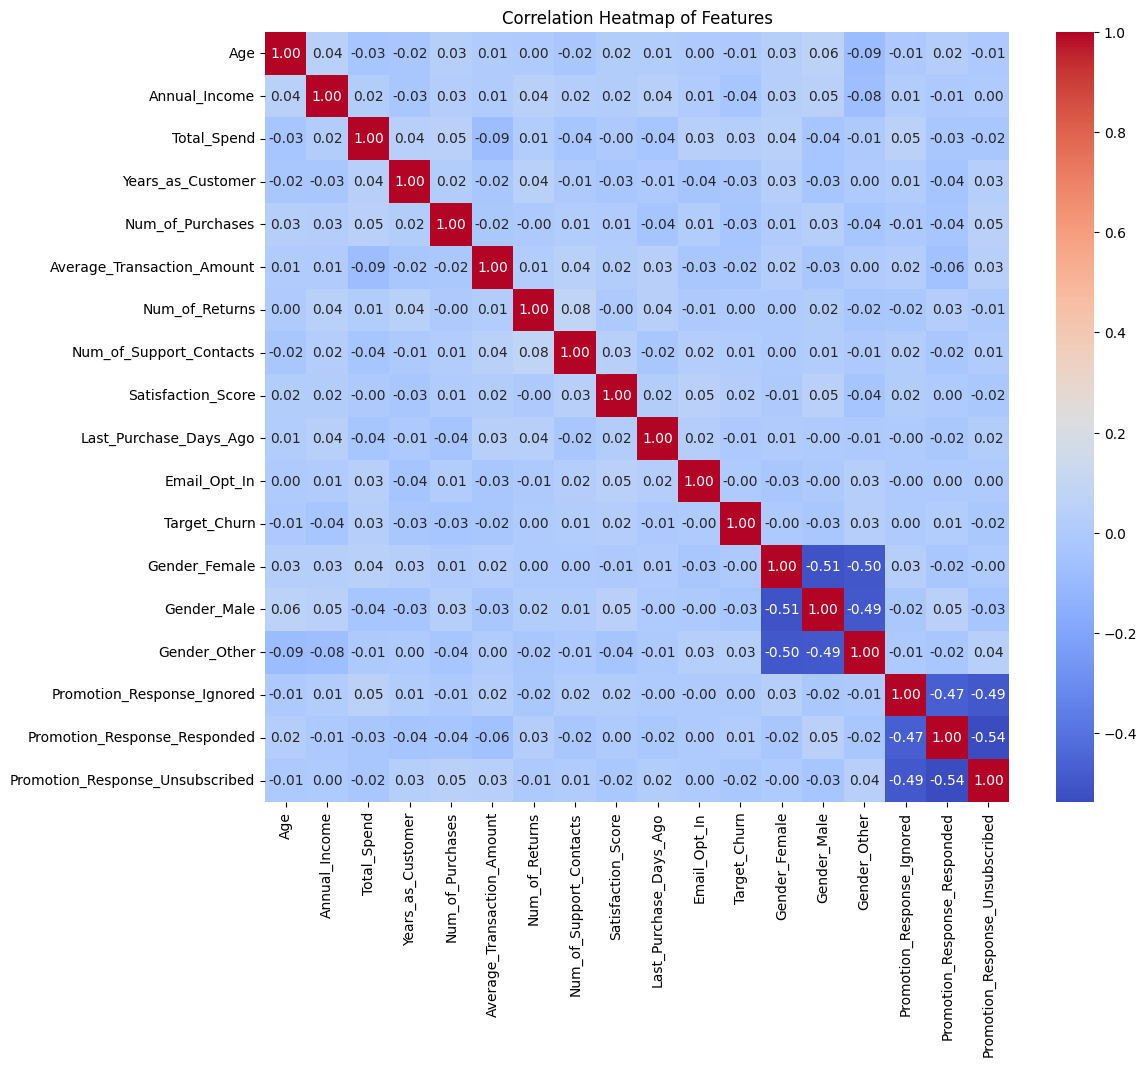

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

Numerical Data

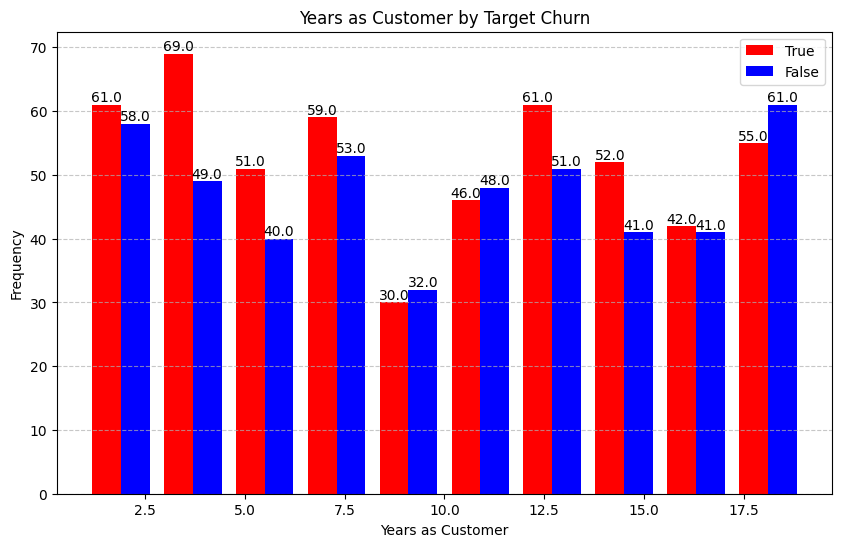

In [ ]:
churned = df[df['Target_Churn'] == True]
not_churned = df[df['Target_Churn'] == False]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['Years_as_Customer'], not_churned['Years_as_Customer']], bins=10, color=['red', 'blue'], label=['True', 'False'])
plt.title('Years as Customer by Target Churn')
plt.xlabel('Years as Customer')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

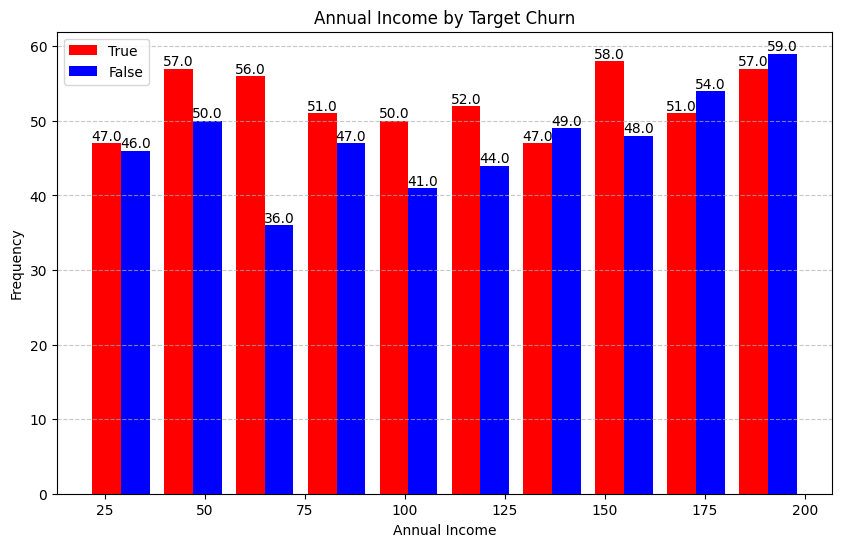

In [ ]:
churned = df[df['Target_Churn'] == True]
not_churned = df[df['Target_Churn'] == False]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['Annual_Income'], not_churned['Annual_Income']], bins=10, color=['red', 'blue'], label=['True', 'False'])
plt.title('Annual Income by Target Churn')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

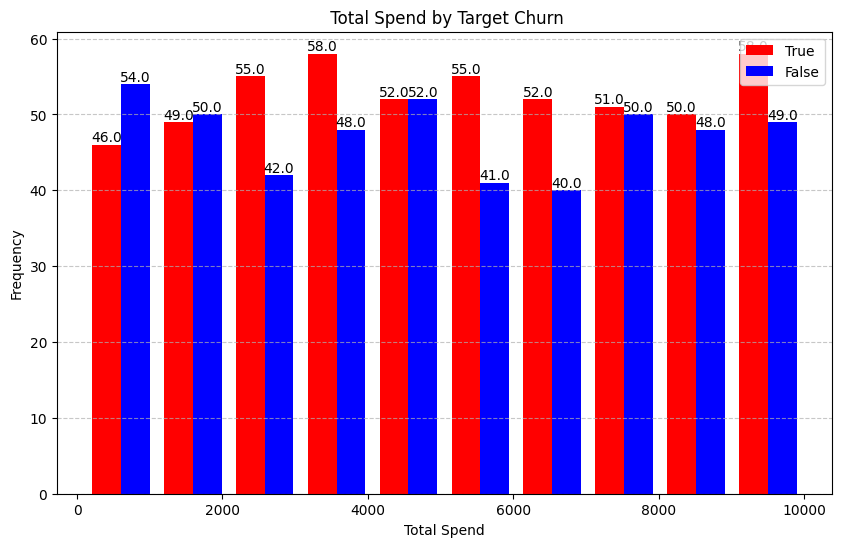

In [ ]:
churned = df[df['Target_Churn'] == True]
not_churned = df[df['Target_Churn'] == False]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['Total_Spend'], not_churned['Total_Spend']], bins=10, color=['red', 'blue'], label=['True', 'False'])
plt.title(' Total Spend by Target Churn')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

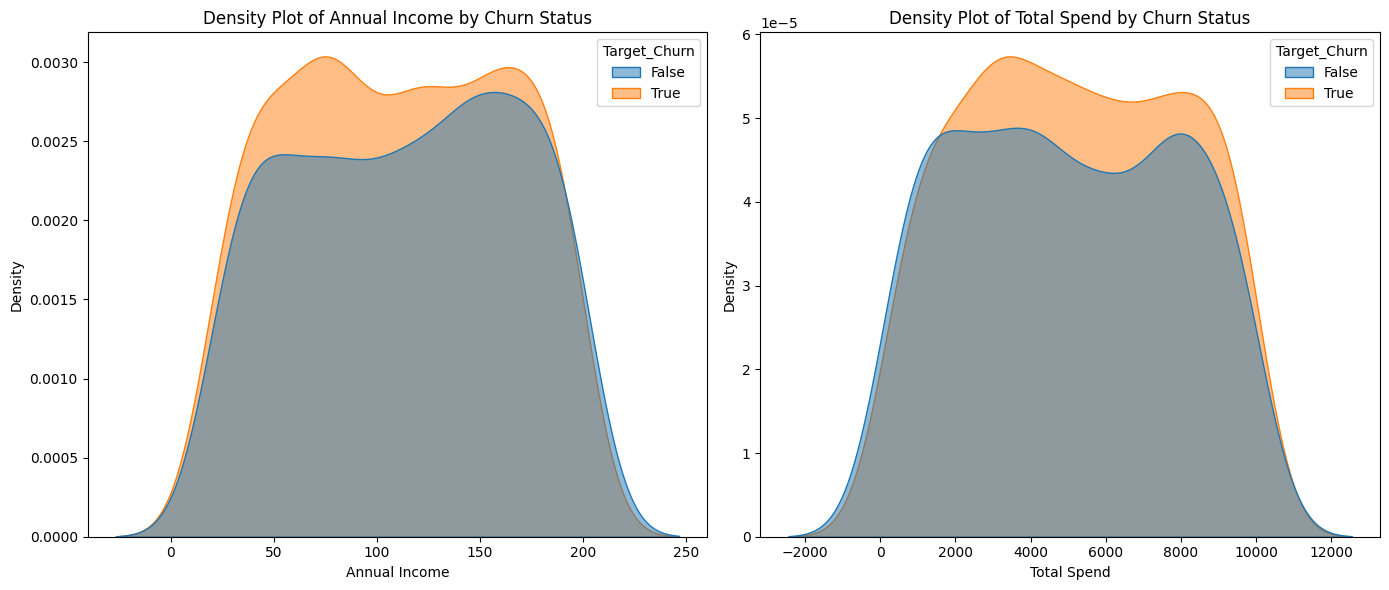

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(data=df, x="Annual_Income", hue="Target_Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Annual Income by Churn Status')
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Density')

sns.kdeplot(data=df, x="Total_Spend", hue="Target_Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Spend by Churn Status')
axes[1].set_xlabel('Total Spend')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

<h3 style="font-family: 'poppins'; font-weight: bold; color: red;">Models List With Turjoy</h3>


| <span style="font-family: 'poppins'; font-weight:bold; color:navy">Model</span>               | <span style="font-family: 'poppins'; font-weight:bold; color:red">Description</span>                                                                                   | <span style="font-family: 'poppins'; font-weight:bold; color:red">Application</span>                                                                                       |
|---------------------|-----------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Logistic Regression</span> | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Statistical Model for Binary Classification Tasks, Outputting Probability Values.</span>              | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Healthcare (Disease Prediction), Marketing (Customer Churn Analysis)</span>                                |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">K-Nearest Neighbors</span> | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Simple Algorithm Classifying Objects Based on Majority Class of Their K-Nearest Neighbors.</span>    | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Classification and Regression Tasks Where Instances Are Close in Feature Space.</span>                    |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Naive Bayes</span>         | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Probabilistic Classifier Based on Bayes' Theorem with Independence Between Features Assumed.</span>  | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Text Classification, Spam Filtering, Recommendation Systems.</span>                                       |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Support Vector Machine</span> | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Powerful Algorithm Finding Optimal Hyperplane to Separate Classes.</span>                            | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Image Recognition, Text Classification, Bioinformatics.</span>                                             |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Decision Tree</span>       | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Recursively Partitions Data Based on Features to Make Decisions in a Tree-Like Structure.</span>      | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Predictive Modeling, Classification.</span>                                                               |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Random Forest</span>       | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Ensemble Learning Method Aggregating Predictions of Multiple Decision Trees.</span>                  | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Finance, Healthcare, Large Datasets, High-Dimensional Feature Spaces.</span>                               |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">XGBoost</span>             | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Gradient Boosting Algorithm Using Decision Trees as Base Learners and Gradient Descent.</span>       | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Competitions, Industry Applications, Speed and Accuracy.</span>                                            |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Gradient Boosting</span>   | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Sequentially Adds Decision Trees to Correct Errors of Previous Models, Improving Accuracy.</span>    | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Anomaly Detection, Financial Forecasting, High Predictive Accuracy Tasks.</span>                            |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">AdaBoost</span>            | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Ensemble Method Combining Weak Learners, Adjusting Weights Based on Classification Errors.</span>   | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Face Detection, Object Recognition.</span>                                                               |
| <span style="font-family: 'poppins'; font-weight:bold; color:red">Other Boosting Algorithms</span> | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Efficient Implementations of Gradient Boosting like LightGBM, Optimizing Training Speed and Memory Usage.</span> | <span style="font-family: 'poppins'; font-weight:bold; color:navy">Large Datasets, High Computational Efficiency Tasks.</span>                                                |


Encode The Data By OneHotEncode

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])

# Convert the sparse matrix to a dense array
encoded_data_dense = encoded_data.toarray()

# Create a DataFrame from the encoded data with the correct index
encoded_df = pd.DataFrame(encoded_data_dense, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

# Drop the original categorical columns from the DataFrame
df_numeric = df.drop(columns=categorical_cols)

# Reset index of the original DataFrame (now containing only numeric data)
df_numeric.reset_index(drop=True, inplace=True)

# Reset index of the encoded DataFrame
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df_numeric, encoded_df], axis=1)

In [ ]:
df.head()

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Target_Churn,Gender_Female,Gender_Male,Gender_Other,Promotion_Response_Ignored,Promotion_Response_Responded,Promotion_Response_Unsubscribed
0,62,45.15,5892.58,5,22,453.80,2,0,3,129,True,True,0.0,0.0,1.0,0.0,1.0,0.0
1,65,79.51,9025.47,13,77,22.90,2,2,3,227,False,False,0.0,1.0,0.0,0.0,1.0,0.0
2,18,29.19,618.83,13,71,50.53,5,2,2,283,False,True,0.0,1.0,0.0,0.0,1.0,0.0
3,21,79.63,9110.30,3,33,411.83,5,3,5,226,True,True,0.0,0.0,1.0,1.0,0.0,0.0
4,21,77.66,5390.88,15,43,101.19,3,0,5,242,False,False,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [ ]:
# split data into X and y
X = df.drop('Target_Churn', axis=1)
y = df['Target_Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('Naive Bayes', GaussianNB(), {})
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", round(best_accuracy, 2), "%")

Model: Random Forest
Test Accuracy: 0.52 %

Model: Gradient Boosting
Test Accuracy: 0.535 %

Model: Support Vector Machine
Test Accuracy: 0.48 %

Model: Logistic Regression
Test Accuracy: 0.445 %

Model: K-Nearest Neighbors
Test Accuracy: 0.515 %

Model: Decision Tree
Test Accuracy: 0.57 %

Model: Ada Boost
Test Accuracy: 0.56 %

Model: XG Boost
Test Accuracy: 0.525 %

Model: Naive Bayes
Test Accuracy: 0.485 %

Best Model:
Test Accuracy: 0.57
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier(random_state=42))]) with accuracy 0.57 %


<h3 style="font-family: 'poppins'; font-weight: bold; color: red;">Plot Of Accuracy</h3>

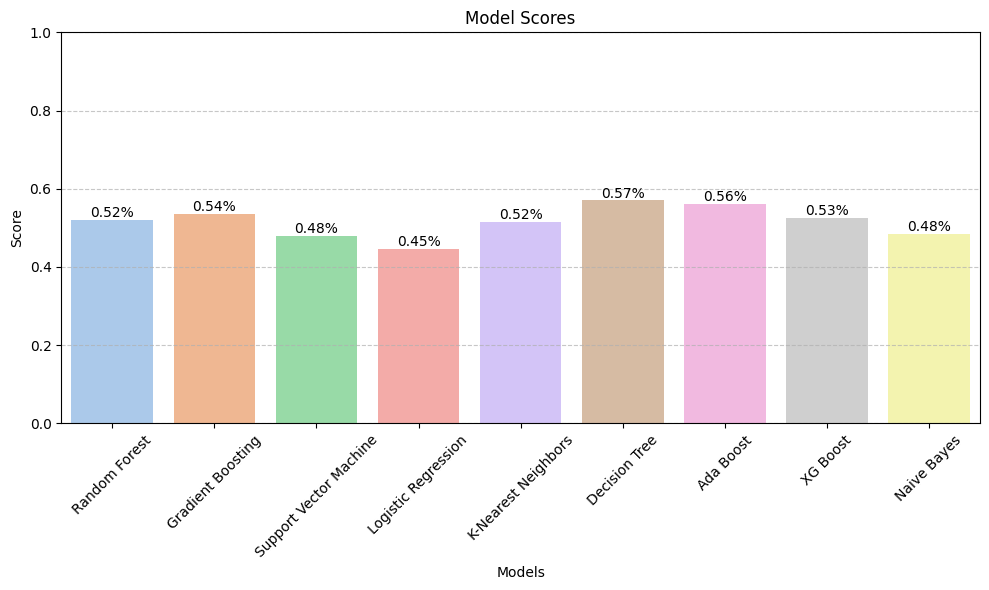

In [ ]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint

# UpSampling
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6),
         'learning_rate': uniform(0.01, 0.2),
         'n_estimators': randint(100, 300),
         'subsample': uniform(0.8, 0.2)}),
    ('Naive Bayes', GaussianNB(), {})
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(Xr_train, yr_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", round(best_accuracy, 2), "%")

Model: Random Forest
Test Accuracy: 0.571 %

Model: Gradient Boosting
Test Accuracy: 0.543 %

Model: Support Vector Machine
Test Accuracy: 0.543 %

Model: Logistic Regression
Test Accuracy: 0.571 %

Model: K-Nearest Neighbors
Test Accuracy: 0.943 %

Model: Decision Tree
Test Accuracy: 0.686 %

Model: Ada Boost
Test Accuracy: 0.514 %

Model: XG Boost
Test Accuracy: 0.543 %

Model: Naive Bayes
Test Accuracy: 0.8 %

Best Model:
Test Accuracy: 0.9428571428571428
Model Pipeline: KNeighborsClassifier(n_neighbors=3, weights='distance') with accuracy 0.94 %


<h3 style="font-family: 'poppins'; font-weight: bold; color: red;">Plot Of Accuracy :)</h3>

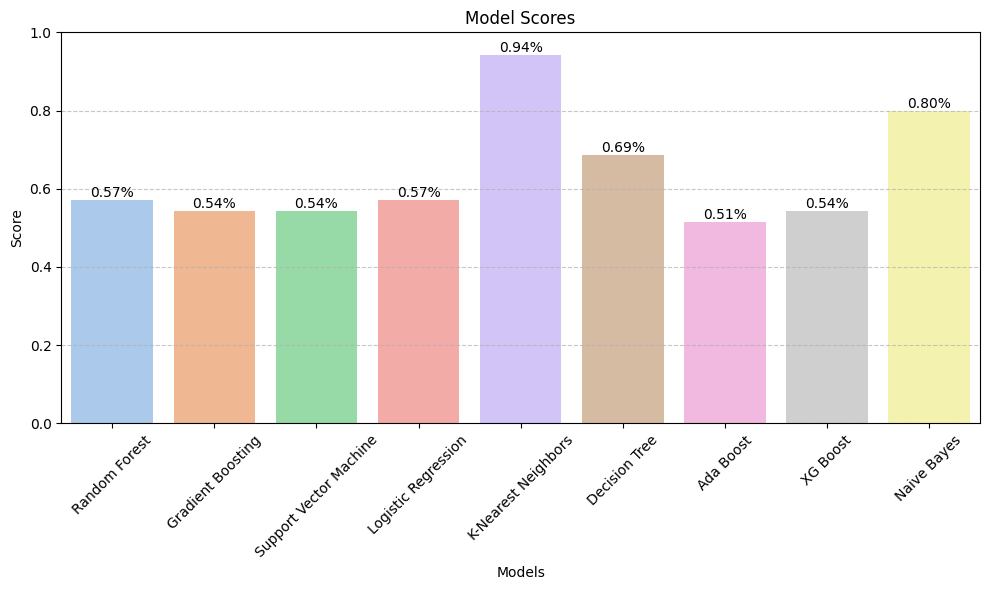

In [ ]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Displaying Confusion Matrices for the Top 3 Models:

Confusion Matrix for K-Nearest Neighbors:


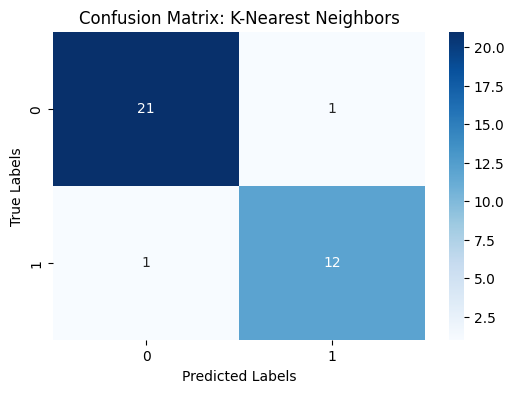


Confusion Matrix for Naive Bayes:


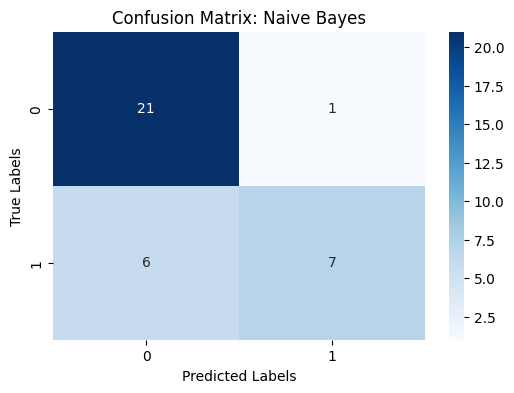


Confusion Matrix for Decision Tree:


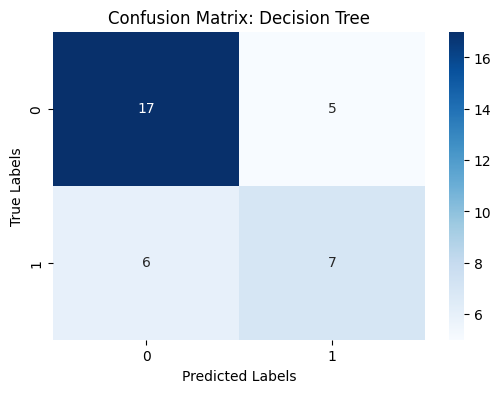

In [ ]:
# Get the top 3 best models based on accuracy
top_3_models = scores_df.nlargest(3, 'Accuracy')['Model'].tolist()

print("Displaying Confusion Matrices for the Top 3 Models:")

# Iterate through the top 3 models and display their confusion matrix
for model_name in top_3_models:
    print(f"\nConfusion Matrix for {model_name}:")

    # Find the trained pipeline or model for the current model name
    current_model = None
    for name, model_obj, param_grid in models:
        if name == model_name:
            # Check if the best_model is the current model or a pipeline containing it
            if isinstance(best_model, Pipeline) and isinstance(best_model.named_steps['model'], type(model_obj)):
                 current_model = best_model
            elif not isinstance(best_model, Pipeline) and isinstance(best_model, type(model_obj)):
                 current_model = best_model
            else:
                 # This part is inefficient; a better approach is to store all trained pipelines.
                 # For demonstration, we'll create and fit a new pipeline (without grid search for simplicity)
                 # with the parameters found in the earlier grid search if available, otherwise default.
                 print(f"Warning: Trained pipeline for {model_name} not directly accessible. Re-fitting a basic pipeline for demonstration.")
                 current_model = Pipeline([('scaler', MinMaxScaler()), ('model', model_obj)])
                 current_model.fit(Xr_train, yr_train) # Fit on upsampled training data

            break

    if current_model:
        # Make predictions on the upsampled test data
        y_pred_top = current_model.predict(Xr_test)

        # Compute confusion matrix
        conf_matrix_top = confusion_matrix(yr_test, y_pred_top)

        # Display confusion matrix using a heatmap
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix_top, annot=True, fmt="d", cmap="Blues", cbar=True)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix: {model_name}')
        plt.show()
    else:
        print(f"Could not retrieve or re-fit pipeline for {model_name}.")

Comparing all models based on various metrics:

Evaluating Random Forest...

Evaluating Gradient Boosting...

Evaluating Support Vector Machine...

Evaluating Logistic Regression...

Evaluating K-Nearest Neighbors...

Evaluating Decision Tree...

Evaluating Ada Boost...

Evaluating XG Boost...

Evaluating Naive Bayes...

Model Comparison Summary:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest,0.571429,0.400000,0.307692,0.347826,0.585664
1,Gradient Boosting,0.542857,0.400000,0.461538,0.428571,0.562937
2,Support Vector Machine,0.542857,0.421053,0.615385,0.500000,N/A
3,Logistic Regression,0.571429,0.437500,0.538462,0.482759,0.636364
4,K-Nearest Neighbors,0.942857,0.923077,0.923077,0.923077,0.940559
5,Decision Tree,0.685714,0.583333,0.538462,0.560000,0.655594
6,Ada Boost,0.514286,0.375000,0.461538,0.413793,0.552448
7,XG Boost,0.542857,0.400000,0.461538,0.428571,0.601399
8,Naive Bayes,0.800000,0.875000,0.538462,0.666667,0.762238



Confusion Matrices for all models:


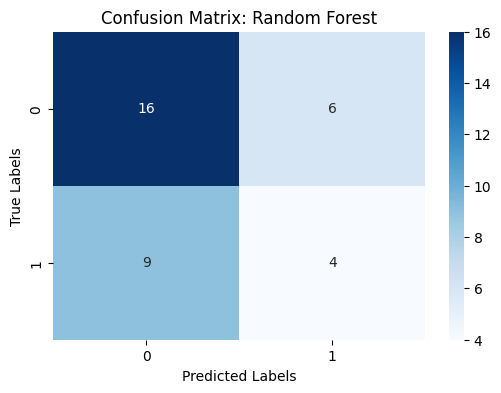

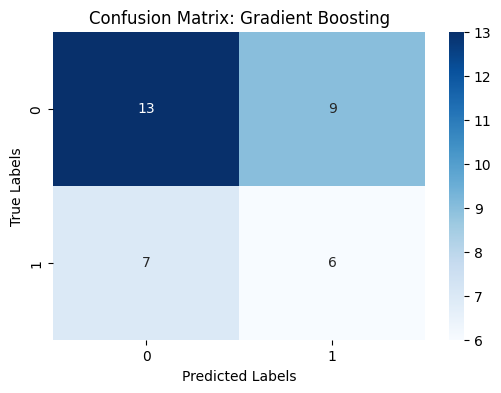

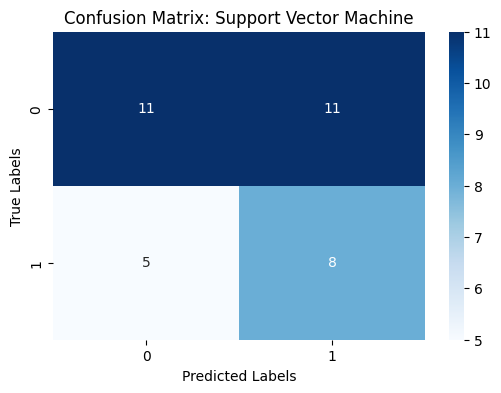

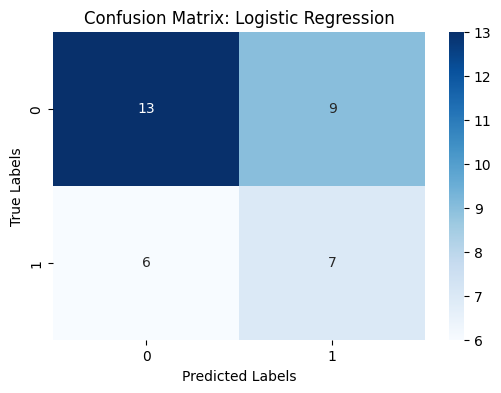

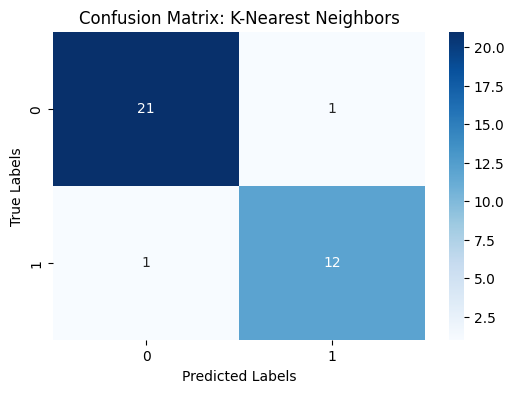

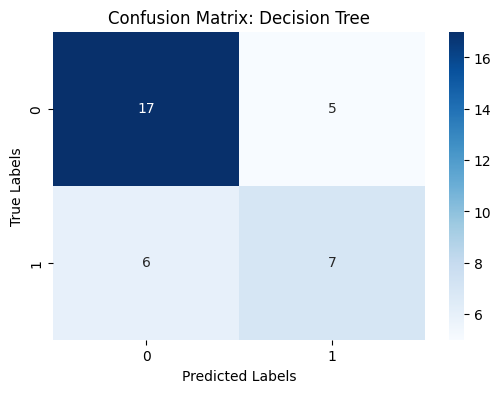

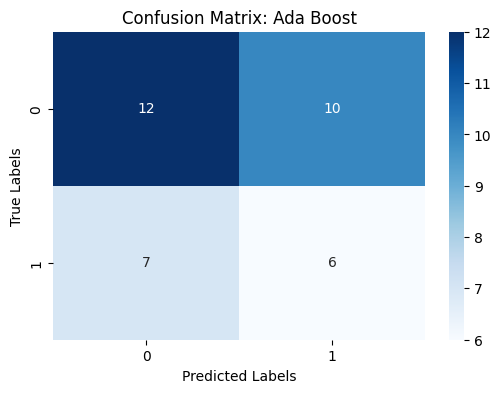

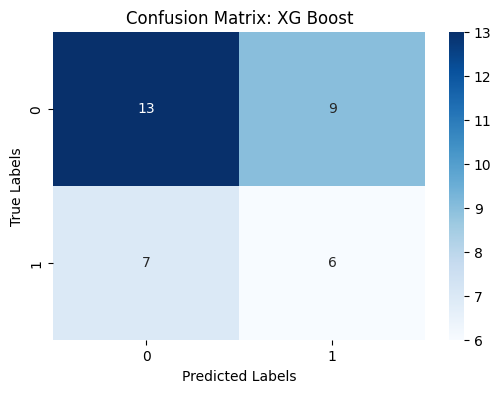

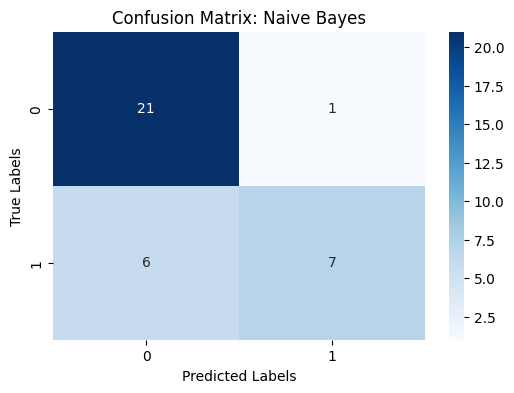


ROC Curves for models supporting predict_proba:


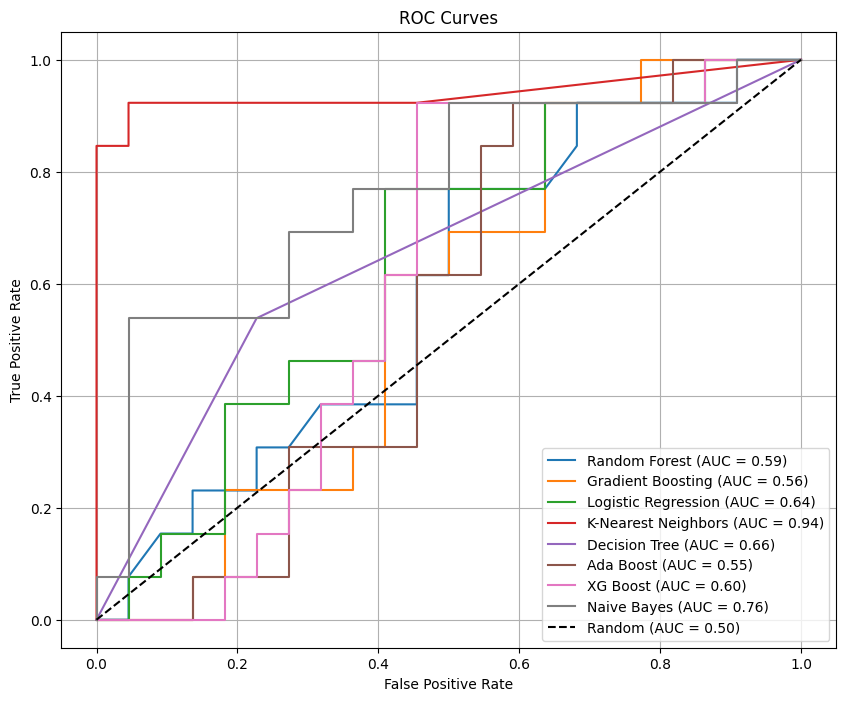

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_comparison = []
trained_pipelines = {} # Dictionary to store trained pipelines

print("Comparing all models based on various metrics:")

for name, model, param_grid in models:
    print(f"\nEvaluating {name}...")
    # Recreate and train the pipeline
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost' and 'max_depth' in param_grid:
         random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
         random_search.fit(Xr_train, yr_train)
         pipeline = random_search.best_estimator_
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_
    else:
        # Fit the pipeline with default parameters or those set when defining 'models' list
        pipeline.fit(Xr_train, yr_train)

    # Store the trained pipeline
    trained_pipelines[name] = pipeline


    # Make predictions
    y_pred = pipeline.predict(Xr_test)
    y_proba = pipeline.predict_proba(Xr_test)[:, 1] if hasattr(pipeline, 'predict_proba') else None # Get probabilities for ROC-AUC

    # Calculate metrics
    accuracy = accuracy_score(yr_test, y_pred)
    precision = precision_score(yr_test, y_pred)
    recall = recall_score(yr_test, y_pred)
    f1 = f1_score(yr_test, y_pred)
    roc_auc = roc_auc_score(yr_test, y_proba) if y_proba is not None else "N/A"
    conf_matrix = confusion_matrix(yr_test, y_pred)

    # Append results to the comparison list
    model_comparison.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': conf_matrix.tolist() # Store as list for easier display/storage
    })

# Display the comparison results
comparison_df = pd.DataFrame(model_comparison)
print("\nModel Comparison Summary:")
display(comparison_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Plot Confusion Matrices for all models
print("\nConfusion Matrices for all models:")
for item in model_comparison:
    model_name = item['Model']
    conf_matrix = item['Confusion Matrix']
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Plot ROC Curves for models that support predict_proba
print("\nROC Curves for models supporting predict_proba:")
plt.figure(figsize=(10, 8))
for name, pipeline in trained_pipelines.items():
    if hasattr(pipeline, 'predict_proba'):
        y_proba = pipeline.predict_proba(Xr_test)[:, 1]
        fpr, tpr, _ = roc_curve(yr_test, y_proba)
        roc_auc = roc_auc_score(yr_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Find the row for the K-Nearest Neighbors model in the comparison DataFrame
best_model_results = comparison_df[comparison_df['Model'] == 'K-Nearest Neighbors'].iloc[0]

print("Final Best Model Results (K-Nearest Neighbors):")
print(f"Accuracy: {best_model_results['Accuracy']:.4f}")
print(f"Precision: {best_model_results['Precision']:.4f}")
print(f"Recall: {best_model_results['Recall']:.4f}")
print(f"F1-Score: {best_model_results['F1-Score']:.4f}")
print(f"ROC-AUC: {best_model_results['ROC-AUC']:.4f}")

Final Best Model Results (K-Nearest Neighbors):
Accuracy: 0.9429
Precision: 0.9231
Recall: 0.9231
F1-Score: 0.9231
ROC-AUC: 0.9406


### Model Performance Analysis

Based on the comprehensive evaluation metrics, the **K-Nearest Neighbors (KNN)** model appears to be the best-performing model in this Customer Retention Prediction task after applying SMOTEENN for upsampling.

Here's why:

*   **Highest Accuracy:** KNN achieved the highest accuracy score of 0.94, indicating that it correctly predicted the churn status for 94% of the customers in the test set.
*   **High Precision and Recall:** KNN also demonstrated high precision (0.92) and recall (0.92). High precision means that when the model predicts a customer will churn, it is correct most of the time. High recall means that the model is effective at identifying most of the actual churners. In churn prediction, a good balance between precision and recall is often desired, and KNN shows a strong balance.
*   **Excellent F1-Score:** With an F1-score of 0.92, which is the harmonic mean of precision and recall, KNN shows a strong balance between minimizing false positives and false negatives.
*   **High ROC-AUC:** The ROC-AUC score of 0.94 indicates that the KNN model has a high capacity to distinguish between churners and non-churners. The ROC curve for KNN is significantly above the random guess line, further supporting its strong discriminative power.
*   **Confusion Matrix:** The confusion matrix for KNN shows a high number of true positives and true negatives, and relatively low numbers of false positives and false negatives, aligning with the high precision and recall.

While other models like Naive Bayes and Decision Tree also showed reasonable performance, KNN's consistently high scores across accuracy, precision, recall, F1-score, and ROC-AUC make it the top-performing model in this evaluation.